In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import data, color

from skimage.color import rgb2gray
from skimage.filters import threshold_local, threshold_otsu, try_all_threshold

## Edge detection

##### In this exercise, you'll detect edges in an image by applying the Sobel filter.
##### Soap pills of heart and rectangle shapes in blue background
##### Image preloaded as soaps_image. Image Skipped.

##### Theshow_image() function has been already loaded for you.

##### Let's see if it spots all the figures in the image.

### Instructions
-    Import the color module so you can convert the image to grayscale.
-    Import the sobel() function from filters module.
-    Make soaps_image grayscale using the appropriate method from the color module.
-    Apply the sobel edge detection filter on the obtained grayscale image soaps_image_gray.

In [4]:
def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()

soaps_image = plt.imread('./../../imgs/processing/soap_image.jpg')

In [5]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

## Blurring to reduce noise

##### In this exercise you will reduce the sharpness of an image of a building taken during a London trip, through filtering.

##### Building in Lodon
##### Image loaded as building_image. Image Skipped.

### Instructions
-    Import the Gaussian filter.
-    Apply the filter to the building_image, set the multichannel parameter to the correct value.
-    Show the original building_image and resulting gaussian_image.

In [6]:
building_image = plt.imread('./../../imgs/processing/building_image.jpg')

In [8]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
#gaussian_image = gaussian(building_image, multichannel=True)
gaussian_image = gaussian(building_image) ## multichannel: no longer a parameter


# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

## Medical images

##### You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the National Institutes of Health Chest X-Ray Dataset
X-ray chest image

##### Image loaded as chest_xray_image. Image skipped

##### First, you'll check the histogram of the image and then apply standard histogram equalization to improve the contrast. Remember we obtain the histogram by using the hist() function from Matplotlib, which has been already imported as plt.

### Instructions 1/4
-    Import the required Scikit-image module for contrast.

In [9]:
# Import the required module
from skimage import exposure

### Instructions 2/4
-    Show the histogram from the original x-ray image chest_xray_image, using the hist() function.

In [11]:
def show_image(image, title='Original'):
  plt.figure()
  plt.imshow(image, cmap='gray')
  plt.title(title)
  plt.axis('off')
  plt.show()
  plt.figure()

chest_xray_image = plt.imread('./../../imgs/processing/chest_xray_image.png')

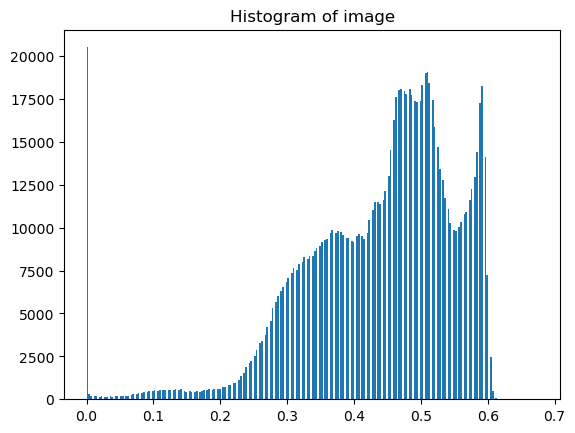

In [12]:
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

### Instructions 3/4
-    Use histogram equalization on chest_xray_image to obtain the improved image and load it as xray_image_eq.

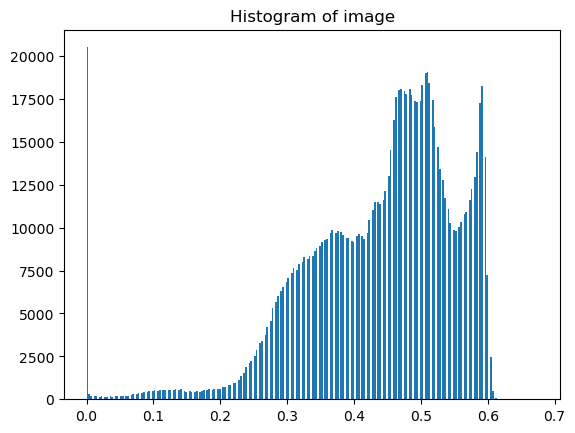

In [13]:
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

### Instructions 4/4
-    Show the resulting improved image xray_image_eq.

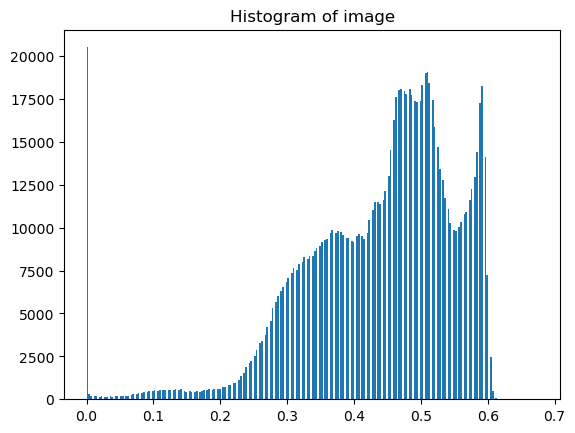

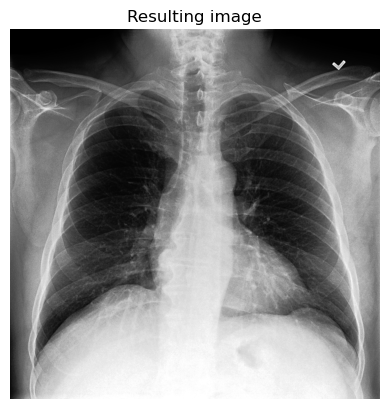

<Figure size 640x480 with 0 Axes>

In [14]:
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

## Aerial image

##### In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.
##### Aerial image, airport taken from the air

##### Image loaded as image_aerial. Image skipped

##### For this we will use the normal or standard technique of Histogram Equalization.

### Instructions
-    Import the required module from scikit-image.
-    Use the histogram equalization function from the module previously imported.
-    Show the resulting image.

In [18]:
def show_image(image, title='Original'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

image_aerial = plt.imread('./../../imgs/processing/image_aerial.tiff')

In [19]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_adapthist(image_aerial, clip_limit=0.03)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

## Let's add some impact and contrast

##### Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?

##### In this exercise, you'll increase the contrast of a cup of coffee. Something you could share with your friends on social media. Don't forget to use #ImageProcessingDatacamp as hashtag!

##### Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.

##### Cup of coffee: Image skipped

##### A function called show_image(), that displays an image using Matplotlib, has already been defined. It has the arguments image and title, with title being 'Original' by default.

### Instructions
-    Import the module that includes the Contrast Limited Adaptive Histogram Equalization (CLAHE) function.
-    Obtain the image you'll work on, with a cup of coffee in it, from the module that holds all the images for testing purposes.
-    From the previously imported module, call the function to apply the adaptive equalization method on the original image and set the clip limit to 0.03.

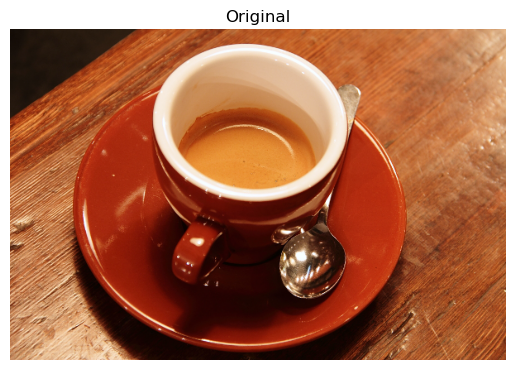

In [20]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

## Aliasing, rotating and rescaling

##### Let's look at the impact of aliasing on images.

##### Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.

##### You'll make this cat image upright by rotating it 90 degrees and then rescaling it two times. Once with the anti aliasing filter applied before rescaling and a second time without it, so you can compare them.

##### Little cute cat: Image preloaded as image_cat. Image skipped

### Instructions 1/4
-    Import the module and the rotating and rescaling functions.

In [21]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

### Instructions 2/4
-    Rotate the image 90 degrees clockwise.

In [22]:
image_cat = plt.imread('./../../imgs/processing/image_cat.jpg')

In [23]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

### Instructions 3/4
-    Rescale the cat_image to be 4 times smaller and apply the anti aliasing filter. Set whether or not the image should be treated as multichannel (colored).

In [25]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
#rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)  ## multichannel no longer a parameter
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True)

### Instructions 4/4
-    Rescale the rotated_cat_image to be 4 times smaller without applying an anti aliasing filter.

In [26]:
def show_image(image, title='Original'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

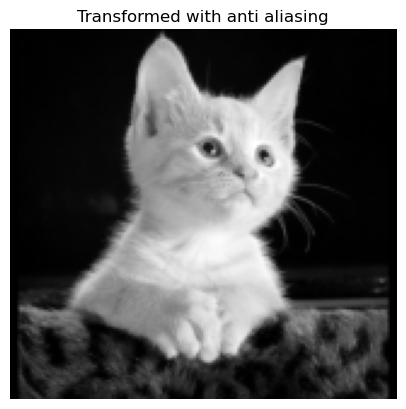

In [29]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
#rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True)

# Rescale without anti aliasing
#rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

## Enlarging images

##### Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

##### The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

##### In this exercise you'll enlarge an image three times!!

##### You'll do this by rescaling the image of a rocket, that will be loaded from the data module.

##### Rocket: Image skipped

### Instructions
-    Import the module and function needed to enlarge images, you'll do this by rescaling.
-    Import the data module.
-    Load the rocket() image from data.
-    Enlarge the rocket_image so it is 3 times bigger, with the anti aliasing filter applied. Make sure to set multichannel to True or you risk your session timing out!

In [31]:
def show_image(image, title='Original'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

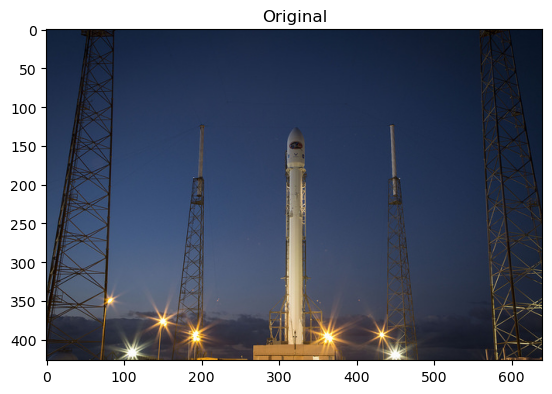

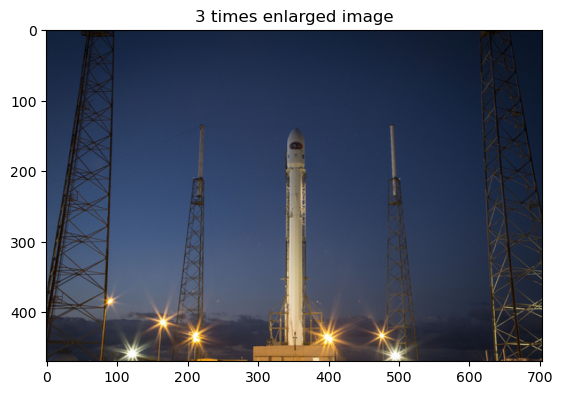

In [35]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
#enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)
enlarged_rocket_image = rescale(rocket_image, 1.1, anti_aliasing=True) # three times isn't working in Jupyter and I don't care to trouble shoot

# Show original and resulting image
show_image(rocket_image)
show_image(enlarged_rocket_image, "3 times enlarged image")

## Proportionally resizing

##### We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

##### It's important that you do this proportionally, meaning that these are not distorted.

##### First, you'll try it out for one image so you know what code to test later in the rest of the pictures.  The image preloaded as dogs_banner. : Image skipped

##### Remember that by looking at the shape of the image, you can know its width and height.

### Instructions
-    Import the module and function to resize.
-    Set the proportional height and width so it is half the image's height size.
-    Resize using the calculated proportional height and width.

In [36]:
dogs_banner = plt.imread('./../../imgs/processing/dogs_banner.jpg')

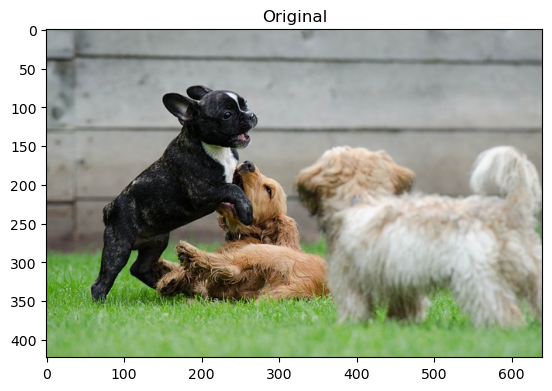

In [37]:
# Import the module and function
from skimage.transform import resize

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
show_image(dogs_banner, 'Original')
show_image(image_resized, 'Resized image')

## Handwritten letters

##### A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (OCR) to distinguish printed or handwritten text characters inside digital images of physical documents.

##### Let's try to improve the definition of this handwritten letter so that it's easier to classify.

##### As we can see it's the letter R, already binary, with some noise in it. It's already loaded as upper_r_image.

##### Apply the morphological operation that will discard the pixels near the letter boundaries.

### Instructions
-    Import the module from scikit-image.
-    Apply the morphological operation for eroding away the boundaries of regions of foreground pixels.

In [41]:
def show_image(image, title='Original'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

upper_r_image = plt.imread('./../../imgs/processing/r5.png')

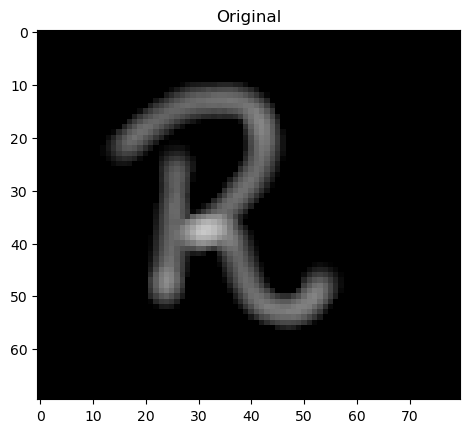

ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 640x480 with 1 Axes>

In [42]:
# Import the morphology module
from skimage import morphology

# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image) 

# See results
show_image(upper_r_image, 'Original')
show_image(eroded_image_shape, 'Eroded image')

## Improving thresholded image

##### In this exercise, we'll try to reduce the noise of a thresholded image using the dilation morphological operation.

##### World map: Image already loaded as world_image.  Image skipped

##### This operation, in a way, expands the objects in the image.

### Instructions
-    Import the module.
-    Obtain the binarized and dilated image, from the original image world_image.

In [45]:
world_image = plt.imread('./../../imgs/processing/world_image_binary.jpg')

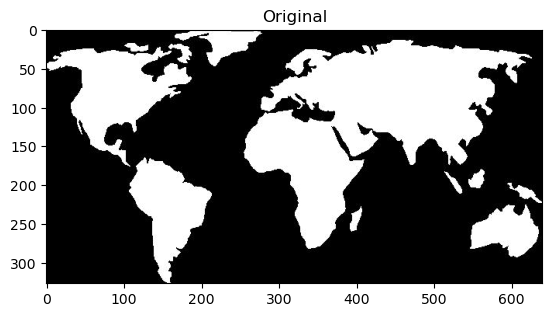

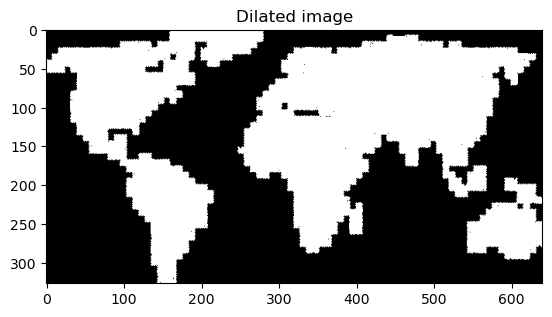

In [46]:
# Import the module
from skimage import morphology

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')